In [30]:
import cv2

# Carregando a imagem:
imagem = cv2.imread('C:/Users/ramon/OneDrive/Documentos/GitHub/visao-computacional/images/veropeso.jpg')

In [31]:
imagem.shape

(1152, 1920, 3)

In [32]:
# Mostrando algumas informações básicas 
print(f"Altura: {imagem.shape[0]} pixels")
print(f"Largura: {imagem.shape[1]} pixels")
print(f"Canais de cores: {imagem.shape[2]}")

Altura: 1152 pixels
Largura: 1920 pixels
Canais de cores: 3


In [33]:
# Mostramdo a imagem 
cv2.imshow('Figura', imagem)
cv2.waitKey(0) # Aguarda uma tecla ser presionada para fechar a imagem aberta
cv2.destroyAllWindows() # Fecha a janela aberta

In [34]:
# Salvando uma cópia da imagem
cv2.imwrite('C:/Users/ramon/OneDrive/Documentos/GitHub/visao-computacional/images/copia/veropeso-cv.jpg', imagem)

True

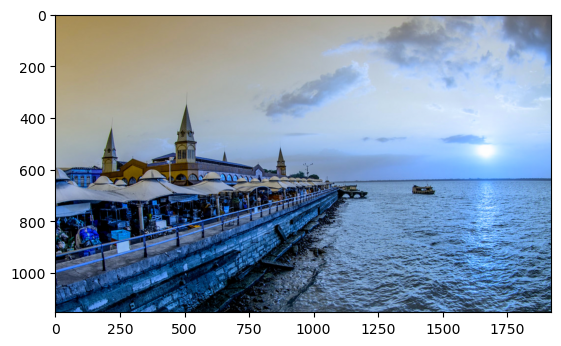

In [35]:
# Mostrando a imagem dentro do Jupyter Notebook 
from matplotlib import pyplot as plt

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # O OpenCV armazena a imagem no formato BGR em vez de RGB
plt.imshow(imagem)
plt.show()

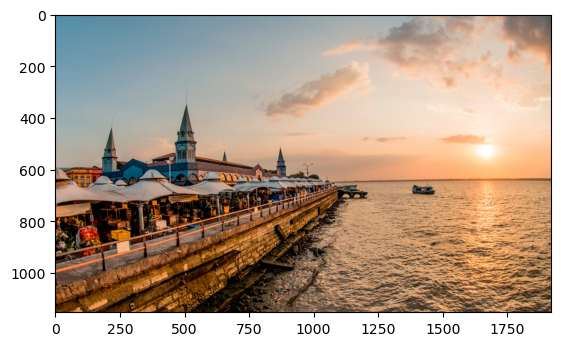

In [36]:
# Mostrando a imagem RGB 
plt.imshow(imagem_rgb)
plt.show()

In [37]:
# Splitting & Merging 

# Carregando a imagem e obtendo cada canal BGR separadamente 
(b, g, r) = cv2.split(imagem)

# Agora vamos visualizar cada canal em cores separadamente (zerando os canais de outras cores em cada cenário)
import numpy as np
zeros = np.zeros(imagem.shape[:2], dtype = 'uint8') # Cria matriz de duas dimensões (altura, largura) preenchida de zeros
cv2.imshow('Vermelho', cv2.merge([zeros, zeros, r]))
cv2.imshow('Verde', cv2.merge([zeros, g, zeros]))
cv2.imshow('Azul', cv2.merge([b, zeros, zeros]))

# Juntando novamente a imagem 
merged = cv2.merge([b, g, r])
cv2.imshow('Merged', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()